<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Convolutional Neural Networks And Computer Vision with TensorFlow

In the prievious notebook we've covered the basics of TensorFlow and built some models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, **Convolutional neural networks (CNNs)** can be used for computer vision (detecting patterns in visual data).

> **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
- Classify whether a picture of food contains pizza 🍕 or steak 🥩
- Detect whether or not an object appears in an image.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example
- Steps in modelling for binary image classification with CNNs
    - Becoming one with the data
    - Preparing data for modelling
    - Creating a CNN model
    - Fitting a model
    - Evaluating a model
    - Improving a model
    - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
    - Same as above (but this time with a different dataset)

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. Whate you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input images(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size,image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.Keras.layers.ConvXD` (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`tf.keras.activations.relu`) |
| Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully connected layer | Further refines learned features from convolutional layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi) |
| Output activation | Adds non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` |

Example stack together : 

<center><img src = "images/03-simple-convnet.png" width = 800px></center>

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.


We'll download the `pizza_steak` subset .zip file and unzip it.

In [1]:
# Install wget
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bf7d243210c4c58d11c8ae616e17b4f5ccb7493dd5c84a507d854a2f875be8d6
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import zipfile
import wget

# Download zip file of pizza_steak images
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
wget.download(url)

'pizza_steak.zip'

In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
- A **train** directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.

- A **test** directory with the same structure as the **train** directory.

Let's inspect each of the directories we've downloaded.

To do so, we can use the command `ls` which stands for list.

In [4]:
ls "pizza_steak"

test/  train/


We can see we've got a train and test folder

In [5]:
ls "pizza_steak/train"

pizza/  steak/


In [6]:
ls "pizza_steak/train/steak"

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg   443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  169

We have a whole bunch of images. It seems we have 750 images.

In [7]:
import os

# Walk through pizza_steak directory and list  number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a  a longer list of classes)
import pathlib
data_dir = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['pizza', 'steak']

> **Note:** Whenever you're working with data, it's always good to visualize it as much as possible.

Let's visualize our images

In [10]:
# Visualize the images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimp
import random

def view_random_image(target_dir,target_class):
    """
    Visualize a random picture of a selected class from a target directory 
    
    Inputs:
    - target_dir : path of the target directory
    - target_class : name of the target class

    Return:
    - img : image
    """

    # setup the targert directory 
    target_folder = f'{target_dir}/{target_class}'

    # get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    # Reag in the image and plot it using matplotlib
    img = mpimp.imread(f'{target_folder}/{random_image[0]}')
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # show the shape of the image
    print(f"Image shape: {img.shape}")

    return img


Image shape: (384, 512, 3)


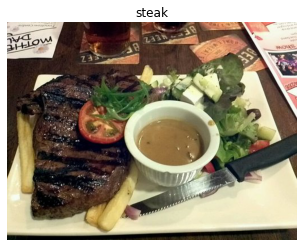

In [11]:
# view a random image from the training set
img = view_random_image(target_dir="pizza_steak/train",target_class="steak")

Image shape: (512, 512, 3)
Image shape: (289, 512, 3)
Image shape: (341, 512, 3)
Image shape: (512, 512, 3)


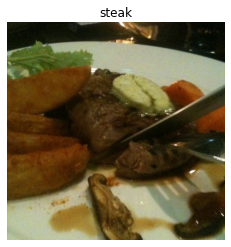

In [12]:
# let's plot different images of the steak class
for i in range(4):
    view_random_image(target_dir="pizza_steak/train",target_class="steak")

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (432, 512, 3)
Image shape: (512, 512, 3)


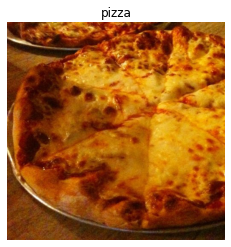

In [13]:
# let's plot different images of the pizza class
for i in range(4):
    view_random_image(target_dir="pizza_steak/train",target_class="pizza")

In [14]:
# view the img
img

array([[[149, 132, 122],
        [176, 159, 149],
        [198, 181, 171],
        ...,
        [229, 229, 217],
        [251, 251, 239],
        [241, 241, 229]],

       [[202, 185, 175],
        [227, 210, 200],
        [237, 220, 210],
        ...,
        [248, 248, 236],
        [252, 252, 240],
        [249, 249, 237]],

       [[195, 178, 168],
        [225, 208, 198],
        [239, 222, 212],
        ...,
        [255, 255, 244],
        [244, 242, 230],
        [240, 238, 226]],

       ...,

       [[ 11,  20,  15],
        [  5,  14,   9],
        [  1,  10,   5],
        ...,
        [ 64,  51,  35],
        [ 65,  52,  36],
        [ 59,  46,  30]],

       [[  0,  11,   3],
        [  4,  15,   7],
        [  6,  17,   9],
        ...,
        [ 55,  42,  26],
        [ 59,  46,  30],
        [ 57,  44,  28]],

       [[  0,   4,   0],
        [  4,  15,   7],
        [ 14,  25,  17],
        ...,
        [ 54,  41,  25],
        [ 59,  46,  30],
        [ 59,  46,  30]]

In [15]:
# shape of img
img.shape

(384, 512, 3)

As we can see img is a big tensor. The computer sees the images in the form of an array.

Looking at the image shape more closely, we can se it's in the form `(width, height, colour channels)`. In our case the width and height are vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of **red, green and blue (RGB) pixels**.

You'll notice all of the values in the `img` are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we built a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [16]:
# Get all the pixel values between 0 and 1
max_pixel_value = img.max()
print(max_pixel_value)

img/max_pixel_value

255


array([[[0.58431373, 0.51764706, 0.47843137],
        [0.69019608, 0.62352941, 0.58431373],
        [0.77647059, 0.70980392, 0.67058824],
        ...,
        [0.89803922, 0.89803922, 0.85098039],
        [0.98431373, 0.98431373, 0.9372549 ],
        [0.94509804, 0.94509804, 0.89803922]],

       [[0.79215686, 0.7254902 , 0.68627451],
        [0.89019608, 0.82352941, 0.78431373],
        [0.92941176, 0.8627451 , 0.82352941],
        ...,
        [0.97254902, 0.97254902, 0.9254902 ],
        [0.98823529, 0.98823529, 0.94117647],
        [0.97647059, 0.97647059, 0.92941176]],

       [[0.76470588, 0.69803922, 0.65882353],
        [0.88235294, 0.81568627, 0.77647059],
        [0.9372549 , 0.87058824, 0.83137255],
        ...,
        [1.        , 1.        , 0.95686275],
        [0.95686275, 0.94901961, 0.90196078],
        [0.94117647, 0.93333333, 0.88627451]],

       ...,

       [[0.04313725, 0.07843137, 0.05882353],
        [0.01960784, 0.05490196, 0.03529412],
        [0.00392157, 0

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a **Random Forest machine learning model** and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> **Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some king of modelling paper with a published result and try to beat it.

The code in the following cell replicates an end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

> **Resource:** The architecture we're using below is a scaled-down version of **VGG-16**, a convolutional neural network which came 2nd in the 2014 **ImageNet classification competition**

In [17]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# set seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), # batches
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 213ms/step - loss: 0.5641 - accuracy: 0.6933 - val_loss: 0.3598 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4178 - accuracy: 0.8100 - val_loss: 0.3345 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4182 - accuracy: 0.8080 - val_loss: 0.3406 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3724 - accuracy: 0.8400 - val_loss: 0.3345 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3409 - accuracy: 0.8580 - val_loss: 0.3550 - val_accuracy: 0.8400


> **Note :** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all the above cells as changing the runtime type causes Colab to have to reset.

After 5 epochs our model got ~88% accuracy on the training set and ~85% and the test set.

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food 101 dataset, so we can't directly compare these metrics to the baseline.

In [19]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

We have replicated the architecture of the CNN Explainer website or Tiny VGG architecture model.

Now there are a few new things here we haven't discussed, namely:
- The `ImageDataGenerator` class and the `rescale` parameter
- The `flow_from_directory()` method
  - The `batch_size` parameter
  - the `target_size` parameter
- `Conv2D` layers
- `MaxPool2D` layers
- The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all the same parameters in our previous model except for changing two things:
- **The data** - we're now working with images instead of dots.
- **The input shape** - we have to tell our neural network the shape of the images we're working with.
  - A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224,224,3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [20]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_2 = model_2.fit(train_data, epochs = 5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 1.0609 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [21]:
# Check out the model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> **Note :** You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher numbezr of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.


Since our model didn't work, let's try to improve it by increasing the number of neurons in each dense layer from 4 to 100 and add an extra layer.

> **Note :** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [22]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 3.7706 - accuracy: 0.5867 - val_loss: 2.4838 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.8935 - accuracy: 0.7120 - val_loss: 0.4696 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5796 - accuracy: 0.7373 - val_loss: 0.4877 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5005 - accuracy: 0.7873 - val_loss: 0.6939 - val_accuracy: 0.6560
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4709 - accuracy: 0.8033 - val_loss: 0.4330 - val_accuracy: 0.7960


In [23]:
# summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification : Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model
7. Repeat until satisfied

### 1. Import and become one with the data

Whatever the kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You can also notice if some of your data is messed up and start to consider ways you might go about fixing it.

Image shape: (344, 512, 3)
Image shape: (307, 512, 3)


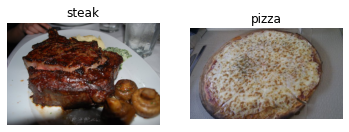

In [24]:
# Visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 3. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into a training set and a test set. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
- 10,000 imahges (or more) might not fit into the memory of your processor (GPU)
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

To turn our data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets.

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model. 

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing. Remember from before how we imported an image and it's pixel values were between 0 and 255? 

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and thei pixel values being normalized.

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Looks like our training set has 1500 images belonging to 2 classes (pizza and steak) and our test set has 500 images also belonging to 2 classes.

Some things here:
- Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
- The `target_size` parameter defines the input size of our images in `(height,width)` format.
- The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
- The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [28]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels of train_data

images.shape, labels

((32, 224, 224, 3),
 array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32))

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
# Get the first two images
images[:2]

array([[[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],

        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],

        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],

        ...,

        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352943]

In [31]:
# shape of an image
images[0].shape

(224, 224, 3)

In [32]:
# View the labels of the batches
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either 0 (pizza) or 1 (steak)

### 3. Create a model

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing the best on **ImageNet** (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> **Note :** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model 
model_4 = Sequential([
      Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu",input_shape=(224,224,3)), # input layer
      Conv2D(10,3,activation="relu"),
      Conv2D(10,3,activation="relu"),
      Flatten(),
      Dense(1,activation="sigmoid") # output layer
])

We've got a simple convolutional neural network architecture ready to go. And it follows the typical CNN structure of:

Input -> Conv + ReLU layers -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the `Conv2D` layer:

- The `2D` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel individually.

| Hyperparameter name | What does it do? | Typical Values |
| ----- | ----- | ----- |
| `Filters` | Decides how many filters should pass over an input tensor | 10, 32, 64, 128 |
| `Kernel size (filter size)` | The size of our filters, for example, a kernel_sze of (3,3) will mean each filter will have the size of 3x3, meaning it will look at a space of 3x3 pixels each time. | 3, 5, 7 |
| `stride` | The number of pixels a filter will move accross as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time | 1, 2, 3 ...  |
| `padding` | `'same`' adds zeros to the outside of the image so the resulting output of the convolutional layers is the same as the input, where `'valid'` cuts off excess pixels where the filter doesn't fit | 'same' or 'valid' |

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza.

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [36]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 1.0793 - accuracy: 0.7000 - val_loss: 0.4711 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4430 - accuracy: 0.8113 - val_loss: 0.3961 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3374 - accuracy: 0.8640 - val_loss: 0.4145 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.1881 - accuracy: 0.9347 - val_loss: 0.4489 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.0776 - accuracy: 0.9780 - val_loss: 0.4842 - val_accuracy: 0.8140


- `steps_per_epoch` : this is the number of batches a model will go through per epoch, in our case, we want ourr model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 -> 1500/32 =~ 47 steps)
- `validation_steps` : same as above, except for the `validation_data` parameter (500 test images in batches of 32 -> 500/32 =~ 16 steps). 

### 5. Evaluate the model

It looks like our model is learning something. Let's check out its training curves.

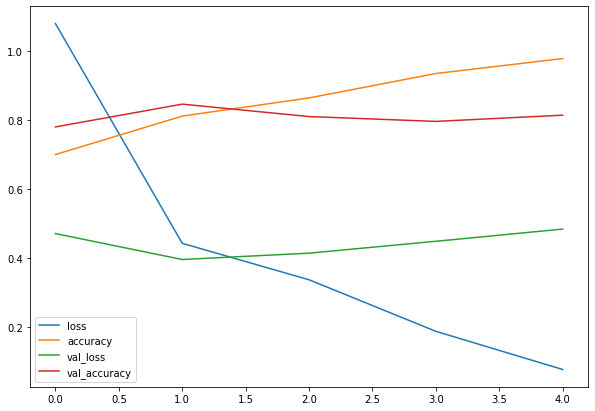

In [38]:
# plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  Input:
  - history : history of the fitted model
  """

  # loss 
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # accuracy
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # epochs
  epochs = range(len(history.history["loss"]))

  # figure, axes
  fig, axs = plt.subplots(1,2,figsize=(15,7))

  # Plot loss
  axs[0].plot(epochs, loss, label="training_loss")
  axs[0].plot(epochs, val_loss, label="val_loss")
  axs[0].set_xlabel('epochs')
  axs[0].legend()

  # Plot Accuracy
  axs[1].plot(epochs,  accuracy, label="training_accuracy")
  axs[1].plot(epochs, val_accuracy, label="val_accuracy")
  axs[1].set_xlabel('epochs')
  axs[1].legend()

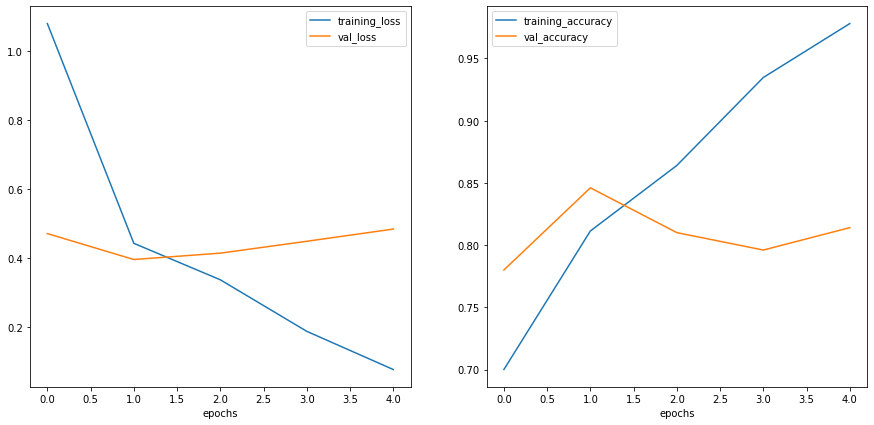

In [40]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

It looks like our model is **overfitting** the training dataset.

> **Note :** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

So far we've gone through steps 1 and 2.

And there are even a few more things we could try to further overfit our model:
- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 3.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
- A ConvNet with **max pooling**
- A ConvNet with max pooling and data augmentation.

In [41]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

If convolutional layers learn the features of an image you can think of a MaxPooling layer as figuring out the *most important* of those features.

In [42]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6081 - accuracy: 0.6687 - val_loss: 0.5363 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4883 - accuracy: 0.7820 - val_loss: 0.4373 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4303 - accuracy: 0.8053 - val_loss: 0.3700 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4488 - accuracy: 0.7947 - val_loss: 0.3961 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4138 - accuracy: 0.8200 - val_loss: 0.3615 - val_accuracy: 0.8580


In [44]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameters is, the more the max poolig layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

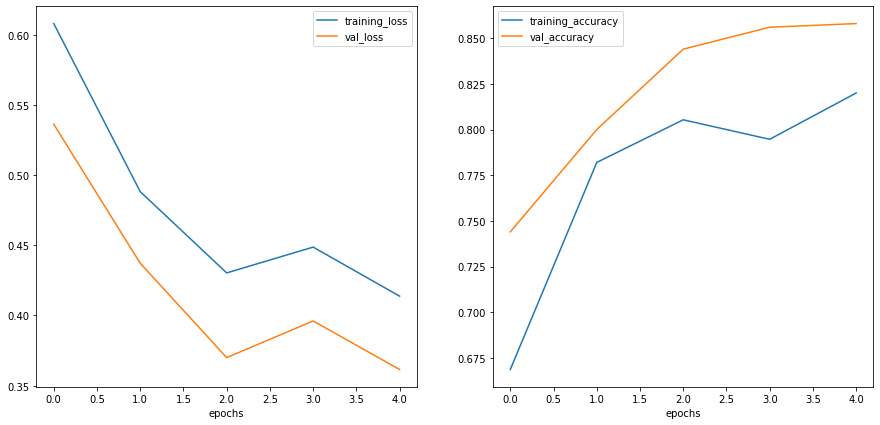

In [45]:
# plot loss curves
plot_loss_curves(history_5)

We can see the training curves get a lot closer to eachother. However, our validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

### Data augmentation


First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our `ImageDataGenerator` instances.

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2,    # how much do you want to shear an image
                                             zoom_range=0.2,     # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True)  # do you want to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withour data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question :** What is data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> **Note :** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.



In [47]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


Finally let's visualize some augmented data!

In [48]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented, only data

showing image number: 11


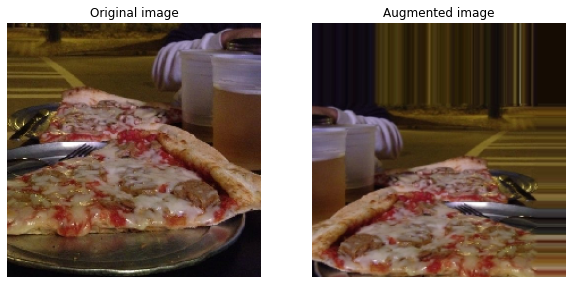

In [49]:
# Show original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32
print(f"showing image number: {random_number}")
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.show()

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> **Question :** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevnet a model overfitting. If your model is overfitting, you may want to try using data augmentation.

As for how to augment data, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

In [50]:
# Create a model
model_6 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 483ms/step - loss: 0.7028 - accuracy: 0.4560 - val_loss: 0.6821 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6902 - accuracy: 0.5733 - val_loss: 0.6717 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6716 - accuracy: 0.6147 - val_loss: 0.6040 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6291 - accuracy: 0.6560 - val_loss: 0.5473 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5877 - accuracy: 0.7233 - val_loss: 0.5394 - val_accuracy: 0.7000


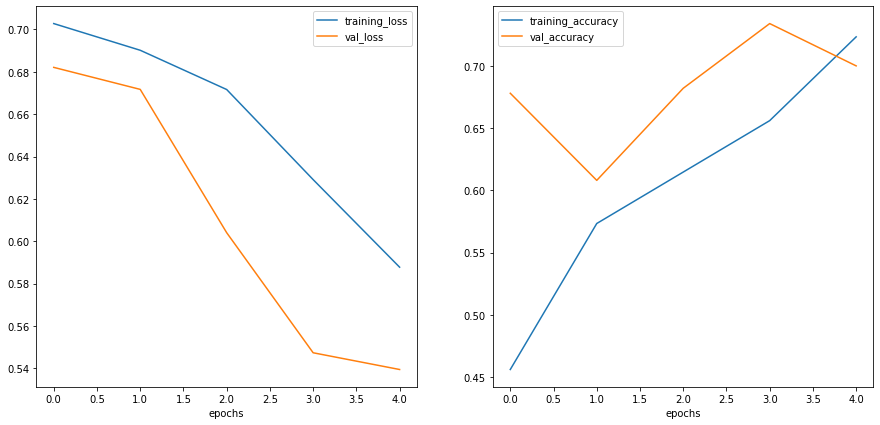

In [51]:
# plot loss curves
plot_loss_curves(history_6)

> **Question :** Why didn't our model get very good results on the training set to begin with?

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes, we can fix this by setting `shuffle=True` on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data. This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

In [52]:
# Create a augmented shuffle generator
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           batch_size=32,
                                                                           class_mode="binary",
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [53]:
# Create a model
model_7 = Sequential([
      Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1,activation="sigmoid")
])

# compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 499ms/step - loss: 0.6417 - accuracy: 0.6213 - val_loss: 0.5422 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5760 - accuracy: 0.7073 - val_loss: 0.5116 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5599 - accuracy: 0.7147 - val_loss: 0.4399 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5097 - accuracy: 0.7433 - val_loss: 0.6376 - val_accuracy: 0.6620
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5168 - accuracy: 0.7567 - val_loss: 0.4172 - val_accuracy: 0.8080


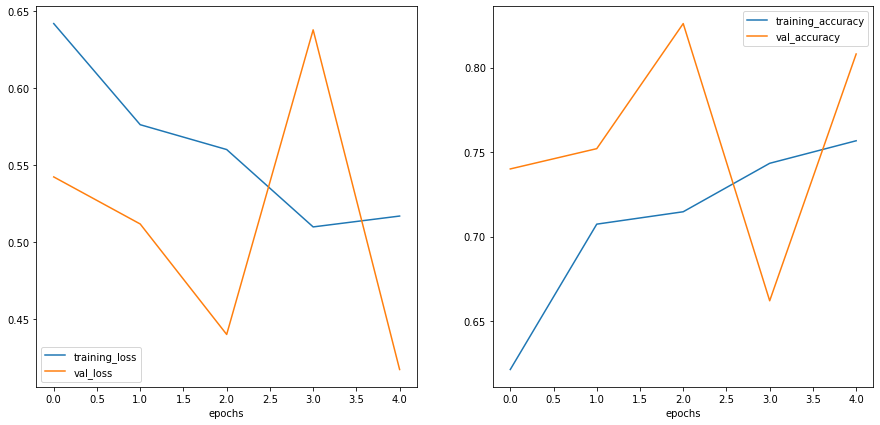

In [54]:
# plot loss curves
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
- Increase the number of model layers
- Increase the number of filters in each convolutional layer
- Train for longer
- Finding an ideal learning rate
- Get more data
- Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as similar to adjusting the settings on your oven to cook your favourite dish.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from **CNN Explainer**)

In [55]:
# create the TinyVGG with augmented shuffled data
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit
history_8 = model_8.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 494ms/step - loss: 0.6501 - accuracy: 0.6260 - val_loss: 0.5062 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.5436 - accuracy: 0.7267 - val_loss: 0.4857 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 23s 486ms/step - loss: 0.5525 - accuracy: 0.7140 - val_loss: 0.4301 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.5333 - accuracy: 0.7387 - val_loss: 0.3923 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 24s 504ms/step - loss: 0.5144 - accuracy: 0.7367 - val_loss: 0.4444 - val_accuracy: 0.7740


Let's compare our `model_8` with the `model_1`

In [56]:
# summary model_8
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [57]:
# summary model_1
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

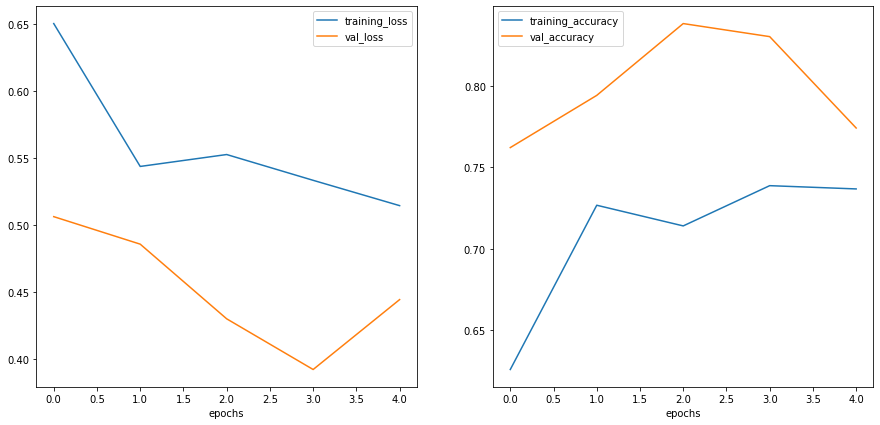

In [58]:
# loss curves model_8
plot_loss_curves(history_8)

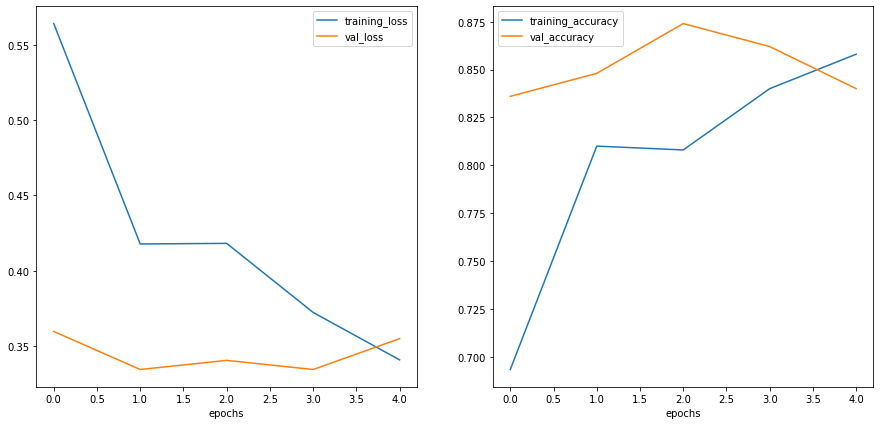

In [59]:
# loss curves model_1
plot_loss_curves(history_1)

Our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

In [60]:
# create the TinyVGG with augmented shuffled data
model_8_bis = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile
model_8_bis.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit
history_8_bis = model_8_bis.fit(train_data_augmented_shuffle,
                        epochs=8,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
47/47 [==============================] - 28s 590ms/step - loss: 0.6460 - accuracy: 0.6260 - val_loss: 0.4594 - val_accuracy: 0.8120
Epoch 2/8
47/47 [==============================] - 23s 484ms/step - loss: 0.5666 - accuracy: 0.7167 - val_loss: 0.4269 - val_accuracy: 0.8400
Epoch 3/8
47/47 [==============================] - 23s 485ms/step - loss: 0.5738 - accuracy: 0.7093 - val_loss: 0.4210 - val_accuracy: 0.8300
Epoch 4/8
47/47 [==============================] - 23s 500ms/step - loss: 0.5166 - accuracy: 0.7493 - val_loss: 0.3955 - val_accuracy: 0.8500
Epoch 5/8
47/47 [==============================] - 23s 484ms/step - loss: 0.4948 - accuracy: 0.7787 - val_loss: 0.3605 - val_accuracy: 0.8660
Epoch 6/8
47/47 [==============================] - 23s 485ms/step - loss: 0.4709 - accuracy: 0.7773 - val_loss: 0.4068 - val_accuracy: 0.8060
Epoch 7/8
47/47 [==============================] - 23s 482ms/step - loss: 0.4726 - accuracy: 0.7860 - val_loss: 0.3393 - val_accuracy: 0.8560
Epoch 

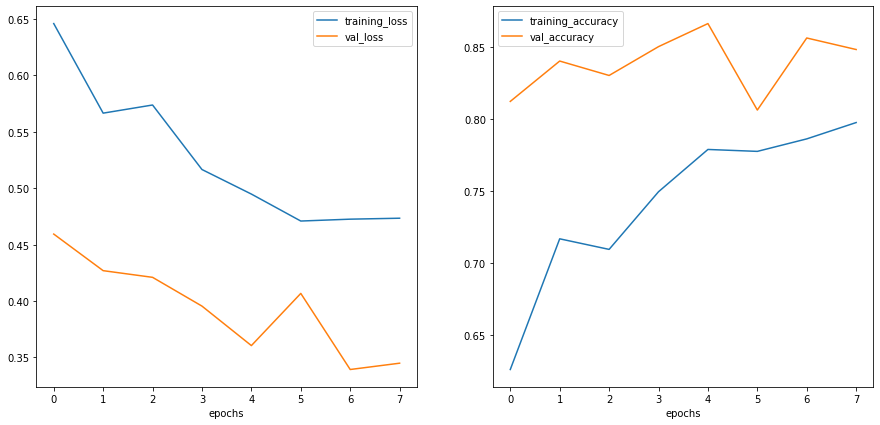

In [61]:
# plot loss curves
plot_loss_curves(history_8_bis)

### Making a prediction with our trained model

In [62]:
# Classes we're working with
print(class_names)

['pizza', 'steak']


--2022-06-19 12:52:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-06-19 12:52:58 (31.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



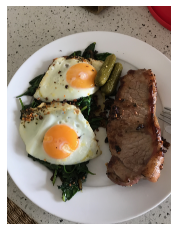

In [63]:
# view our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)
plt.show()

In [64]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [65]:
# check out the array 
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

Since our model takes in images of shapes (224,224,3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using `tf.io.read_file` and `tf.image`

> **Note :** For your model to make predictions on unseen data, your own custome images has te be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [66]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)

  Input:
  - filename : string contains our file name
  - img_shape : shape of the image 
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

Our model was trained on data in the shape of `(batch_size, 224,224,3)` so we need to add an extra dimension to our custom image using `tf.expand_dims`

In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [68]:
# Make a prediction 
pred=model_8.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.8574291]], dtype=float32)

The predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **positive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is more likely to be the **negative class** (class 0).

But saying positive and negative class doesn't make much sense when we're working with pizza and steak.

So let's write a little function to convert predictions into their class names and then plot the target image.

In [69]:
# Remind ourselves of our class names
class_names

['pizza', 'steak']

In [70]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [71]:
from json import load
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an imagr and located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

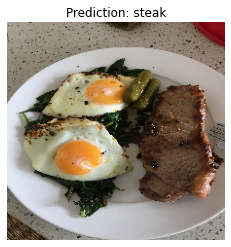

In [72]:
# prediction on a image of a steak
pred_and_plot(model_8, "03-steak.jpeg")

In [73]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-06-19 12:53:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-06-19 12:53:01 (41.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



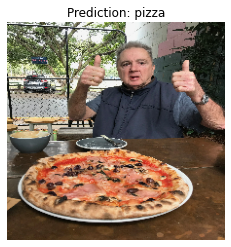

In [74]:
# prediction on a picture of pizza
pred_and_plot(model_8, "03-pizza-dad.jpeg")

### Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

Remember the steps we took before to build our pizza vs steak classifier?

How about we go through those steps again, except this time, we'll work with 10 different type of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied.

#### 1. Import and Become one with the data

In [76]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-06-19 13:05:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   197MB/s    in 2.5s    

2022-06-19 13:05:10 (197 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [80]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories, and {len(filenames)} images in '{dirpath}'.")

There are 2 directories, and 0 images in '10_food_classes_all_data'.
There are 10 directories, and 0 images in '10_food_classes_all_data/train'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories, and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories, and 750 images in '10_food_classes_all_data/t

In [81]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [84]:
# let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


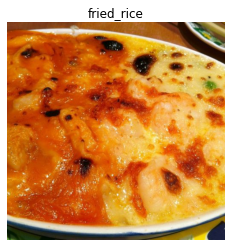

In [107]:
# Visualize the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=np.random.choice(class_names))

Image shape: (512, 512, 3)


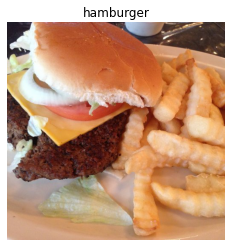

Image shape: (512, 512, 3)


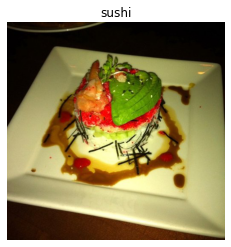

Image shape: (512, 512, 3)


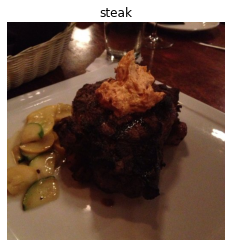

Image shape: (512, 512, 3)


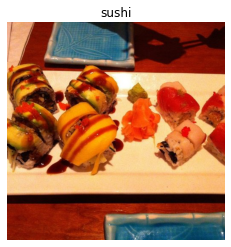

Image shape: (512, 341, 3)


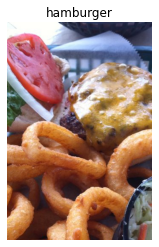

In [110]:
for i in range(5):
  plt.figure()
  view_random_image(target_dir=train_dir,
                        target_class=np.random.choice(class_names))
  plt.show()

#### 2. Preprocess the data

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### 3. Create a model

We can use the same model (Tiny VGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
- Changing the output layer to use jave 10 output neurons
- Changing the output layer to use `softmax` activation instead of `sigmoid` activation
- Changing the loss function to be `categorical_crossentropy` instead of `binary_crossentropy`

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model 
model_9 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [115]:
# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#### 4. Fit the model

In [122]:
# fit our model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 208ms/step - loss: 2.2214 - accuracy: 0.1783 - val_loss: 2.0825 - val_accuracy: 0.2520
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8610 - accuracy: 0.3576 - val_loss: 1.9655 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 48s 205ms/step - loss: 1.1483 - accuracy: 0.6167 - val_loss: 2.2470 - val_accuracy: 0.2700
Epoch 4/5
235/235 [==============================] - 47s 202ms/step - loss: 0.4100 - accuracy: 0.8745 - val_loss: 3.4964 - val_accuracy: 0.2688
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.1075 - accuracy: 0.9696 - val_loss: 4.9261 - val_accuracy: 0.2524


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

#### 5. Evaluate our model

In [123]:
# summary
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

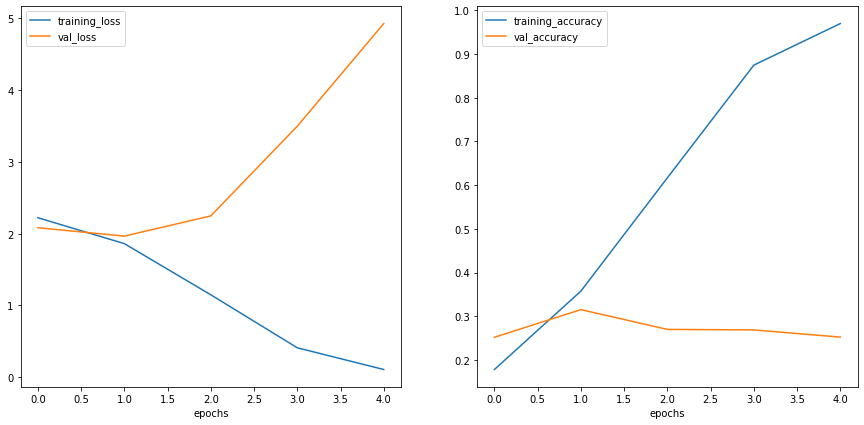

In [124]:
# plot loss curves
plot_loss_curves(history_9)

There is a big gap between the training and validation loss curves.

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

#### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple ways to prevent overfitting include:

- **Get more data** - Having more data  gives the model more opportunities to learn patterns, patterns which may be more generalized to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't abel to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weight) one model has learned to use as the foundation for your own task. In our case, we coul use one computer vision model pretrained on a large variety of images then tweak it slightly to be more specialized for food images.

In [126]:
# Try to simplified the model
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [127]:
# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [128]:
# fit the model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 194ms/step - loss: 2.0762 - accuracy: 0.2584 - val_loss: 1.9123 - val_accuracy: 0.3176
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.6690 - accuracy: 0.4455 - val_loss: 1.8677 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.2082 - accuracy: 0.6144 - val_loss: 1.9635 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 0.6946 - accuracy: 0.7956 - val_loss: 2.2836 - val_accuracy: 0.3280
Epoch 5/5
235/235 [==============================] - 43s 185ms/step - loss: 0.3377 - accuracy: 0.9188 - val_loss: 2.6112 - val_accuracy: 0.3276


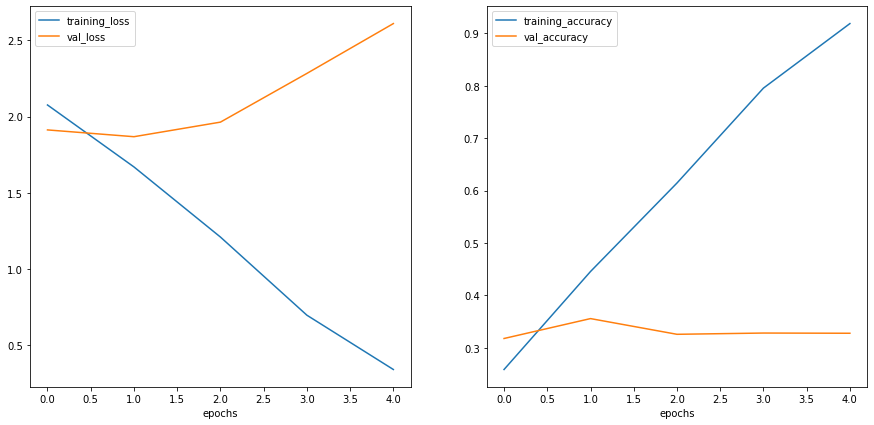

In [129]:
# plot loss curves
plot_loss_curves(history_10)

Even with a simplified model, it looks like our model is still dramatically overfitting the training data.

#### 7. Use Data Augmentation

To create augmented data, we'll recreate a new `ImageGenerator` instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [130]:
# Create augmented data generator intance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             horizontal_flip=True,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")
                                             

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called `clone_model` which can take an existing model and rebuilt it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

> **Note :** One of the key practices in deep learning and machine learning in general is to be **a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [132]:
# create another model
model_11 = tf.keras.models.clone_model(model_10)


# compile the model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 501ms/step - loss: 2.2907 - accuracy: 0.1516 - val_loss: 2.0780 - val_accuracy: 0.2384
Epoch 2/5
235/235 [==============================] - 111s 471ms/step - loss: 2.1164 - accuracy: 0.2440 - val_loss: 2.0285 - val_accuracy: 0.2716
Epoch 3/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0639 - accuracy: 0.2647 - val_loss: 1.9221 - val_accuracy: 0.3136
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0187 - accuracy: 0.2883 - val_loss: 1.9267 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 2.0160 - accuracy: 0.2913 - val_loss: 1.8885 - val_accuracy: 0.3564


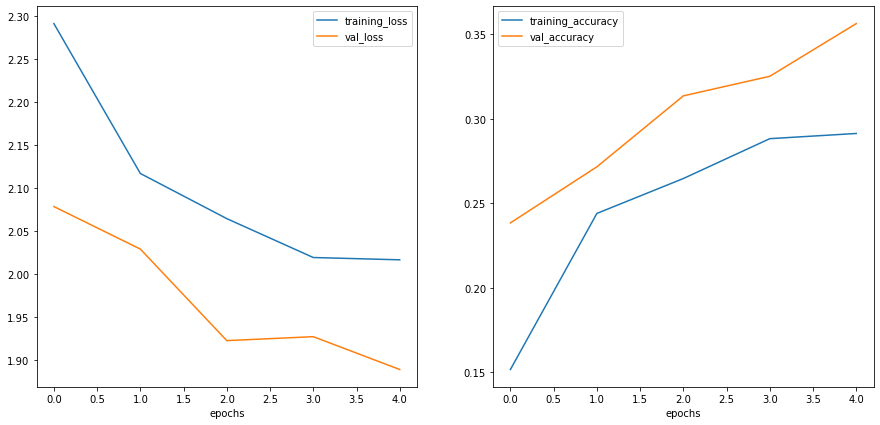

In [133]:
# check out the loss curves
plot_loss_curves(history_11)

That's looking much bettern the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validationn set.

#### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying different methods of data augmentation, training for longer.

In [140]:
# create a new Image data Generator
train_datagen_augmented2 = ImageDataGenerator(rescale=1/255.,
                                              horizontal_flip=True, 
                                              rotation_range=20,
                                              width_shift_range=0.2, 
                                              height_shift_range=0.2)

# new train data augmented
train_data_augmented2 = train_datagen_augmented2.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     class_mode="categorical",
                                                                     batch_size=32,
                                                                     shuffle=True)

Found 7500 images belonging to 10 classes.


In [144]:
# Create a new model
model_12 = Sequential([
  Conv2D(20, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(20, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

In [145]:
# Compile the model
model_12.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [146]:
# fit the model
history_12 = model_12.fit(train_data_augmented2,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented2),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 475ms/step - loss: 2.2674 - accuracy: 0.1791 - val_loss: 2.0852 - val_accuracy: 0.2468
Epoch 2/5
235/235 [==============================] - 112s 475ms/step - loss: 2.0760 - accuracy: 0.2651 - val_loss: 1.9416 - val_accuracy: 0.3144
Epoch 3/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9927 - accuracy: 0.3052 - val_loss: 1.8579 - val_accuracy: 0.3616
Epoch 4/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9412 - accuracy: 0.3287 - val_loss: 1.7395 - val_accuracy: 0.4176
Epoch 5/5
235/235 [==============================] - 111s 472ms/step - loss: 1.9162 - accuracy: 0.3384 - val_loss: 1.8259 - val_accuracy: 0.3988


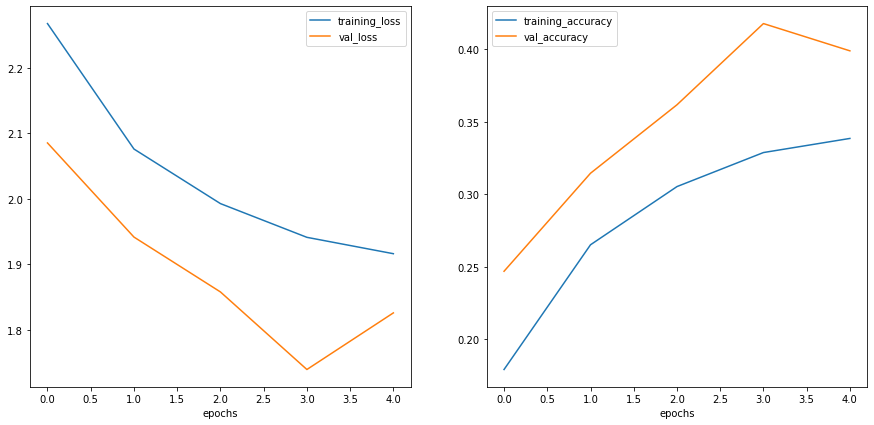

In [147]:
# plot loss curves
plot_loss_curves(history_12)

Adding the parameter shuffle=True in the flow_from_directories and adding more neurons in our conv2d layers allowed the model to perform a little better than the previous model.

#### 8. Making a prediction with our trained model

In [148]:
# the classes of our model
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [149]:
# Download some custom images

!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Make a prediction